# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данными нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.weightstats import *
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/alexander/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['table', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [11]:
train = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_csv('orange_small_churn_labels.train',header=None,names=['label'])

In [12]:
train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [13]:
train.shape

(40000, 230)

In [14]:
labels.head()

,label
0,-1
1,-1
2,-1
3,1
4,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [15]:
labels.label.value_counts()/len(labels)

-1    0.9256
 1    0.0744
Name: label, dtype: float64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция представляет собой бинарную переменную. Теоретически, это не помешает рассчитать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, однако анализировать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспомнить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

X1 ∈ R и X2 ∈ {0, 1} будут положительно коррелированы,
если
E (X1 | X2 = 1) > E (X1 | X2 = 0).
Таким образом, силу взаимосвязи между числовыми пременными будем измерять разностью этих математических ожиданий
E (X1 | X2 = 1) − E (X1 | X2 = 0)

In [16]:
#добавим целевую переменную и создадим общий dataframe
train['label']=labels
train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [17]:
# посмотрим статистику
train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230,label
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0,40000.000000
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN,-0.851200
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN,0.524848
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN,-1.000000
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN,-1.000000
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN,1.000000


#### Корреляция категориальных признаков с использованием коэффициента V-Kramera в пункте 7

In [18]:
# Сначала считаем корреляцию числовых переменных с целевой функцией
corr_list=[]
for j in range(0,190):
    #считаем разницу выборочного среднего, исключая NA
    if pd.isna(np.mean(train[train.label==1].iloc[:,j].dropna())-np.mean(train[train.label==-1].iloc[:,j].dropna()))==False:
        corr_list.append((train.columns[j],abs(np.mean(train[train.label==1].iloc[:,j].dropna())-np.mean(train[train.label==-1].iloc[:,j].dropna()))))

In [19]:
# отсортируем разницу выборочных средних в порядке убывания
corr_sort=sorted(corr_list,key=lambda x:x[1],reverse=True)
corr_top20=corr_sort[0:20]
corr_top20

[('Var131', 10346077.81682243),
 ('Var69', 480858.38842908666),
 ('Var53', 438907.6790387182),
 ('Var177', 401748.7452799191),
 ('Var180', 320162.9532710281),
 ('Var114', 241634.73453810182),
 ('Var111', 193165.14612373238),
 ('Var113', 162842.18453814648),
 ('Var153', 151453.3519627573),
 ('Var154', 141731.55887850467),
 ('Var59', 130636.05560051865),
 ('Var124', 122003.96184798809),
 ('Var10', 101756.8609751385),
 ('Var33', 98084.97129186604),
 ('Var139', 95864.70072781143),
 ('Var38', 77671.00355923455),
 ('Var5', 66949.86675576452),
 ('Var182', 61614.77928464976),
 ('Var36', 57993.37464931124),
 ('Var92', 57588.45971162)]

In [20]:
#сформируем список топ 20 переменных, наиболее коррелирующих с целевой переменной
var_top20=[x[0] for x in corr_top20]

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [21]:
#для удобства сформируем новый DataFrame для топ 20 переменных и целевой функции
train_top20=train[var_top20+['label']]
train_top20.head()

,Var131,Var69,Var53,Var177,Var180,Var114,Var111,Var113,Var153,Var154,...,Var124,Var10,Var33,Var139,Var38,Var5,Var182,Var36,Var92,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1209960.0,2313888.0,NaN,...,NaN,NaN,NaN,NaN,82752.0,NaN,NaN,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417932.0,6502680.0,NaN,...,NaN,NaN,NaN,NaN,2706120.0,NaN,NaN,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-124655.2,10569040.0,NaN,...,NaN,NaN,NaN,NaN,4698780.0,NaN,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378473.6,9676200.0,NaN,...,NaN,NaN,NaN,NaN,864384.0,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142602.4,10535200.0,NaN,...,NaN,NaN,NaN,NaN,4364880.0,NaN,NaN,NaN,NaN,-1


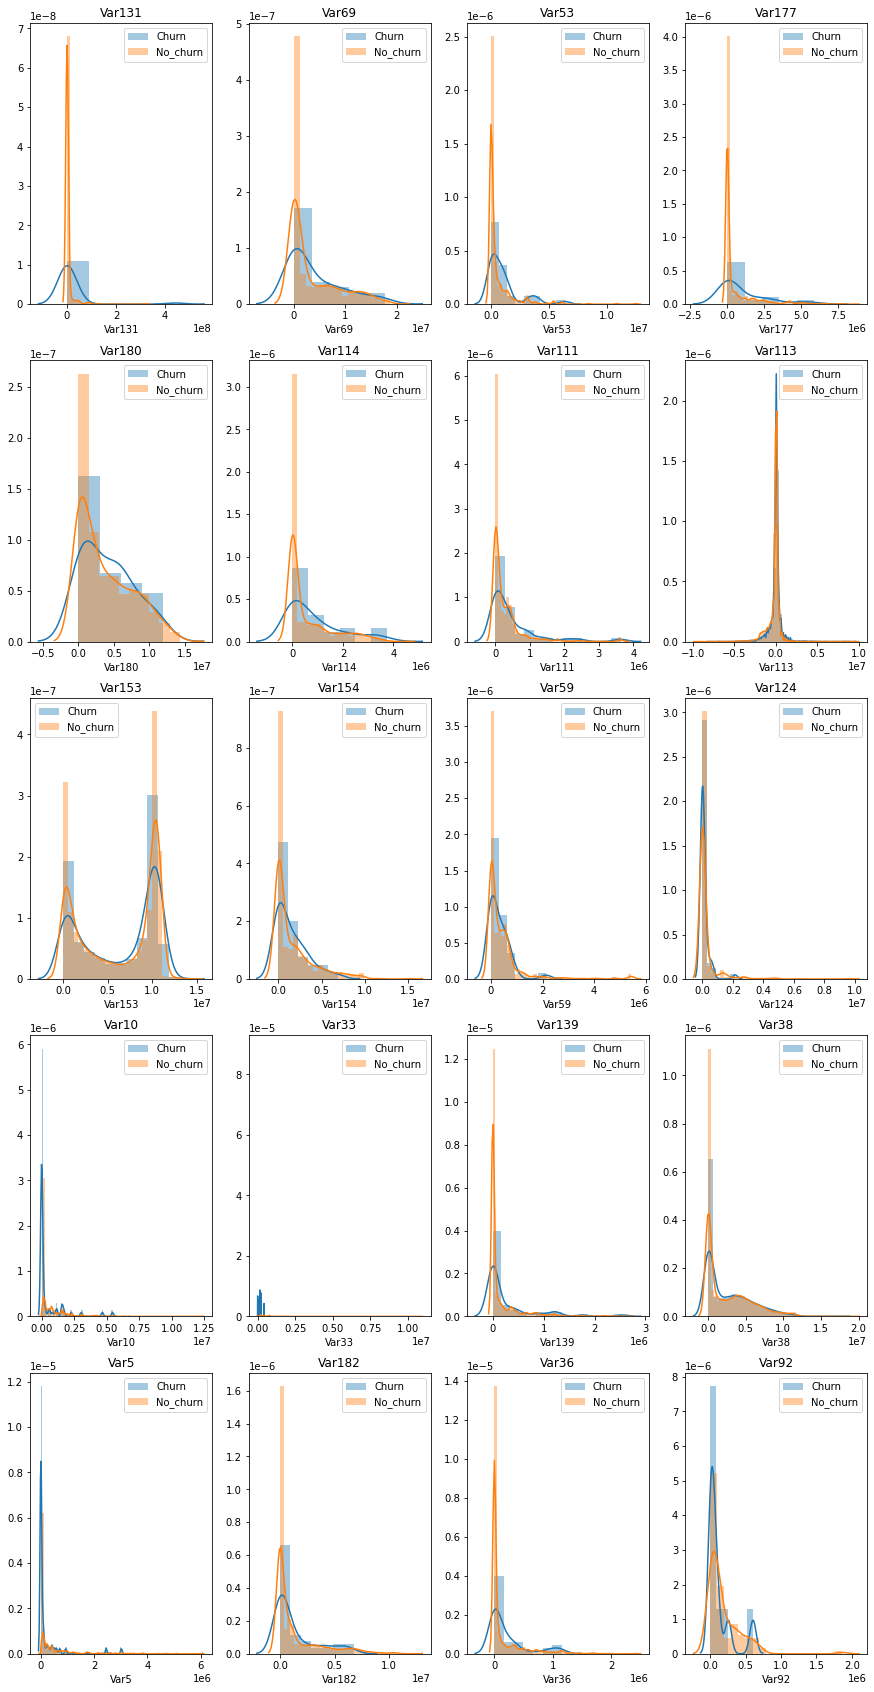

In [26]:
# визуализируем плотность распределения топ 20 числовых переменных, наиболее сильно коррелирующих 
# с целевой функцией в зависимости от класса (churn - отток, no_churn - не отток) 
# Покажем гистограмму совместно с плотностью распределения методом distplot¶

pylab.figure(figsize=(15,30))
for i in range(train_top20.shape[1]-1):
    pylab.subplot(5,4,i+1)
    sns.distplot(train_top20[train_top20['label']==1].iloc[:,i].dropna(),label='Churn',norm_hist=True)
    sns.distplot(train_top20[train_top20['label']==-1].iloc[:,i].dropna(),label='No_churn',norm_hist=True)
    pylab.title(train_top20.columns[i])
    pylab.legend()
pylab.show()

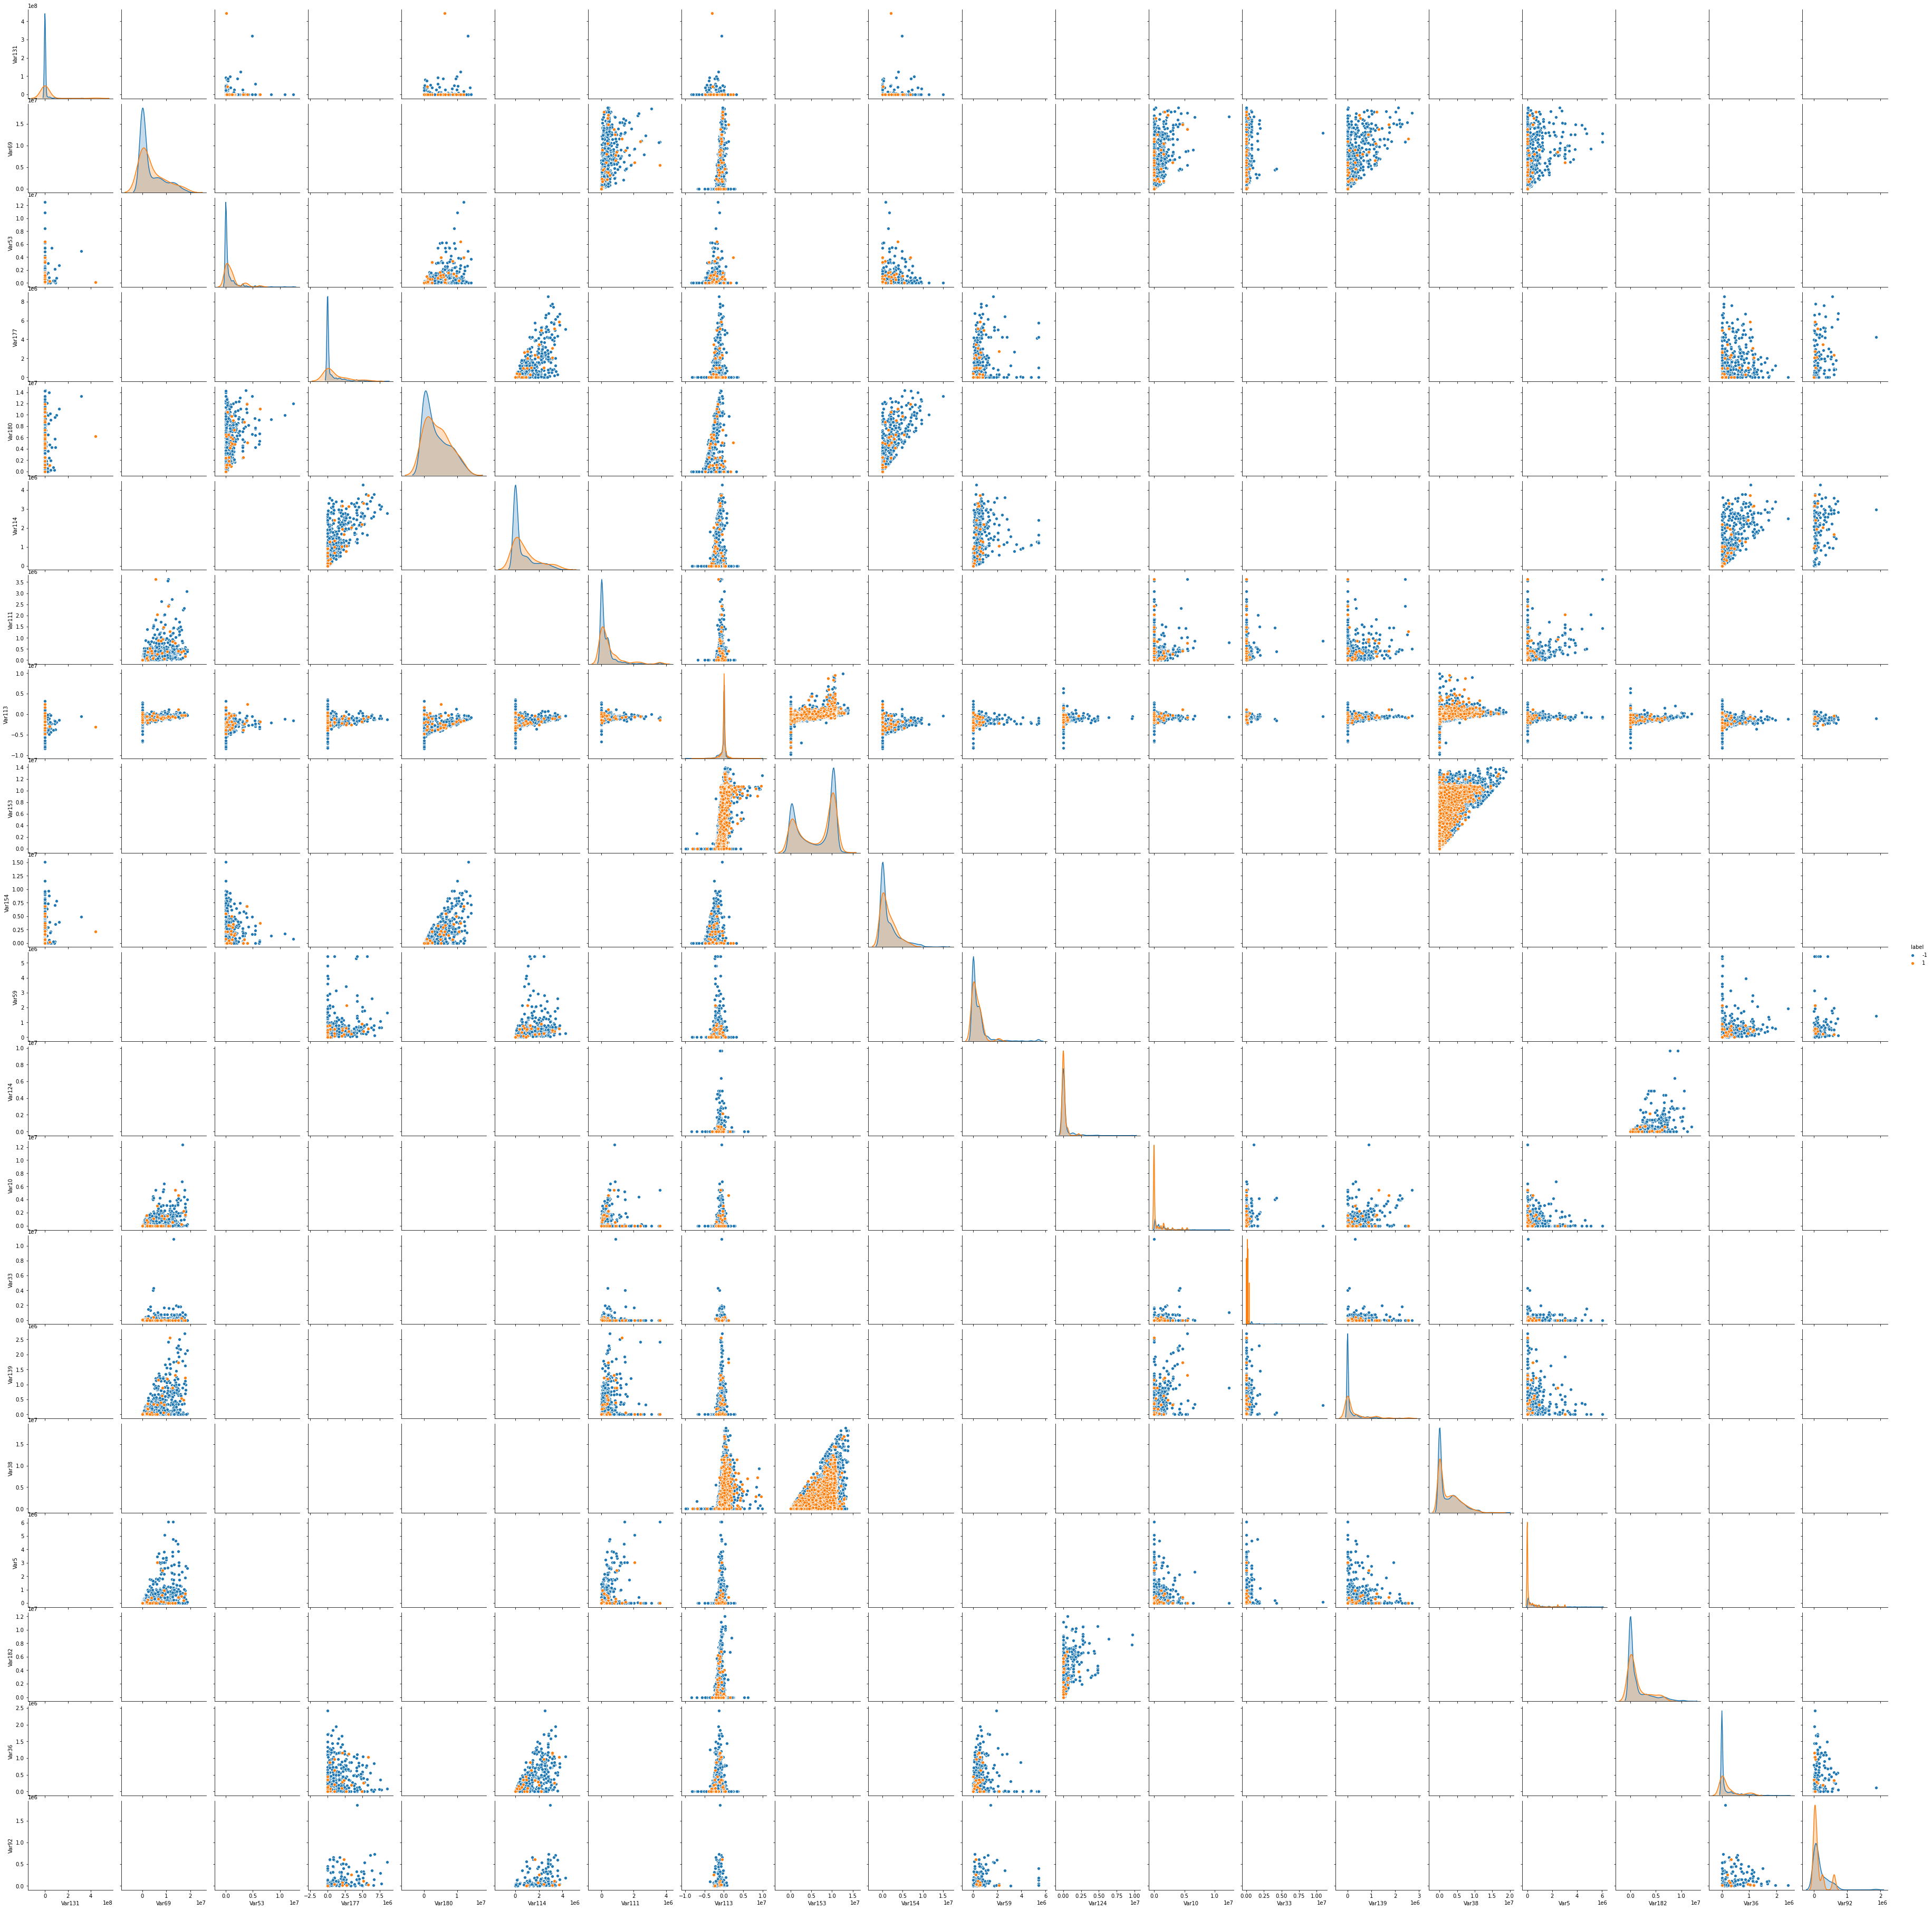

In [27]:
# построим графики пар признаков с помощью pairlot
sns.pairplot(train[var_top20+["label"]],hue="label", diag_kind="kde")

#### По pairplot видим, что есть признаки , кореллирующие между собой, поэтому посмотрим на попарную корреляцию 20ти признаков

In [28]:
train_top20.corr()

,Var131,Var69,Var53,Var177,Var180,Var114,Var111,Var113,Var153,Var154,...,Var124,Var10,Var33,Var139,Var38,Var5,Var182,Var36,Var92,label
Var131,1.000000,NaN,0.070038,NaN,0.109577,NaN,NaN,0.030557,NaN,0.077886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096202
Var69,NaN,1.000000,NaN,NaN,NaN,NaN,0.472302,0.114590,NaN,NaN,...,NaN,0.500205,0.135087,0.621869,NaN,0.450785,NaN,NaN,NaN,0.020819
Var53,0.070038,NaN,1.000000,NaN,0.404399,NaN,NaN,0.080847,NaN,0.068417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079045
Var177,NaN,NaN,NaN,1.000000,NaN,0.749631,NaN,0.042099,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.326632,0.177202,0.060160
Var180,0.109577,NaN,0.404399,NaN,1.000000,NaN,NaN,0.167546,NaN,0.703069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020448
Var114,NaN,NaN,NaN,0.749631,NaN,1.000000,NaN,0.059349,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735676,0.256364,0.051217
Var111,NaN,0.472302,NaN,NaN,NaN,NaN,1.000000,-0.019188,NaN,NaN,...,NaN,0.130976,0.025517,0.226883,NaN,0.268198,NaN,NaN,NaN,0.076956
Var113,0.030557,0.114590,0.080847,0.042099,0.167546,0.059349,-0.019188,1.000000,0.415299,0.089506,...,0.039899,0.032661,0.057798,0.075173,0.278645,0.057301,0.012414,0.039608,0.020917,0.056114
Var153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.415299,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.690074,NaN,NaN,NaN,NaN,0.009315
Var154,0.077886,NaN,0.068417,NaN,0.703069,NaN,NaN,0.089506,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014561


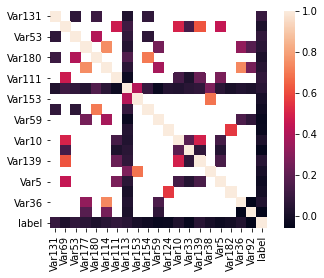

In [29]:
sns.heatmap(train_top20.corr(), square=True)

In [30]:
#отсортируем попарные корреляции топ 20 числовых признаков
corr_vars=[]
a=train_top20.corr()
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if i==j:
            continue
        if pd.isna(a.iloc[i,j])==False:
            corr_vars.append((a.index[i],a.iloc[i,j]))
pair_corr=sorted(corr_vars,key=lambda x:x[1],reverse=True)
pair_corr[0:10]

[('Var177', 0.7496306574851966),
 ('Var114', 0.7496306574851966),
 ('Var114', 0.7356764658166228),
 ('Var36', 0.7356764658166228),
 ('Var180', 0.7030691895283167),
 ('Var154', 0.7030691895283167),
 ('Var153', 0.6900735156075719),
 ('Var38', 0.6900735156075719),
 ('Var69', 0.6218686481895335),
 ('Var139', 0.6218686481895335)]

#### Видим что признаки (Var177, Var114), (Var114, Var36), (Var180,Var154) достаточно сильно коррелируют между собой, отсюда можно сделать вывод о необходимости отбора признаков

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [31]:
import random
random.seed(0)
random_list_10=random.sample(list(train.columns[:190]),10)
random_list_10

['Var99',
 'Var108',
 'Var11',
 'Var67',
 'Var131',
 'Var125',
 'Var104',
 'Var78',
 'Var123',
 'Var92']

/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/alexander/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alexander/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


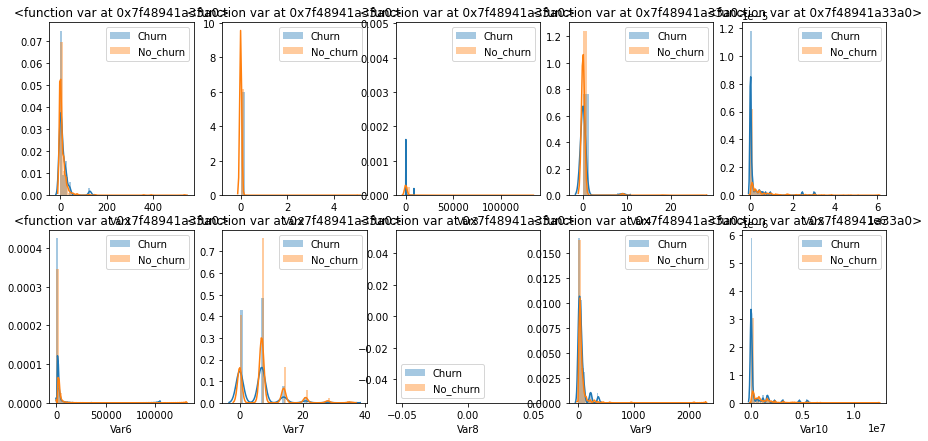

In [32]:
# визуализируем плотность распределения случайных 10 числовых переменных
# с целевой функцией в зависимости от класса (churn - отток, no_churn - не отток) 
# Покажем гистограмму совместно с плотностью распределения методом distplot¶

pylab.figure(figsize=(15,7))
for i in range(len(random_list_10)):
    pylab.subplot(2,5,i+1)
    sns.distplot(train[train['label']==1].iloc[:,i].dropna(),label='Churn',norm_hist=True)
    sns.distplot(train[train['label']==-1].iloc[:,i].dropna(),label='No_churn',norm_hist=True)
    pylab.title(var)
    pylab.legend()
pylab.show()

/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


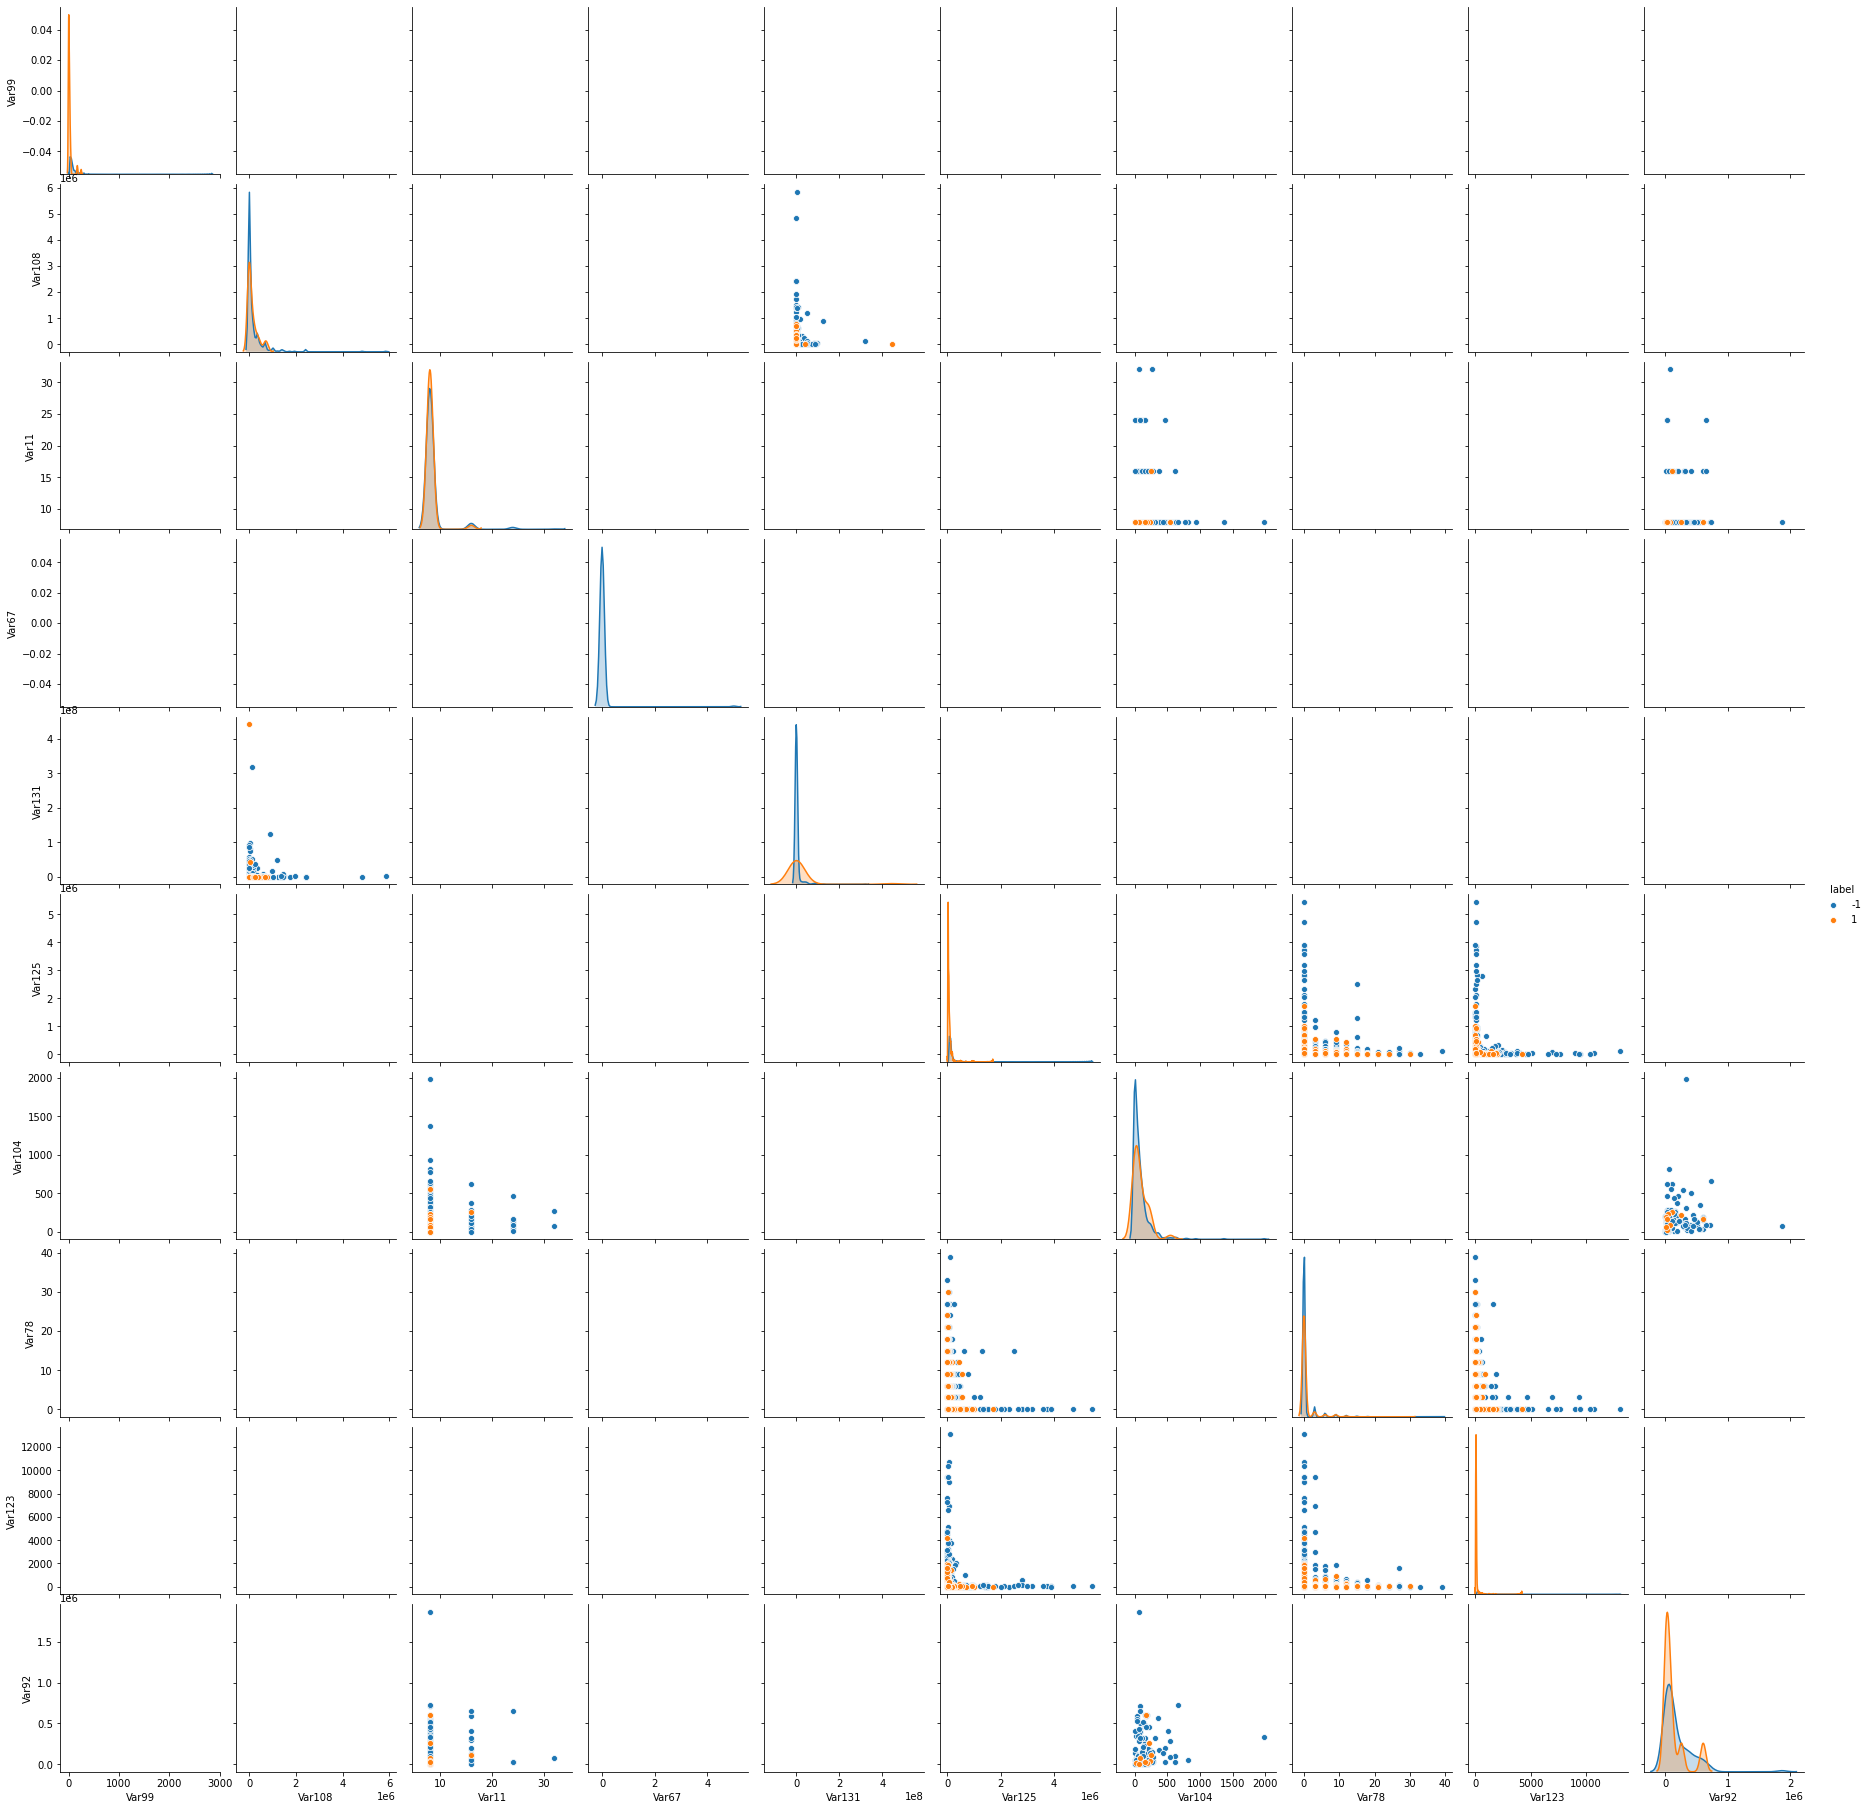

In [33]:
# построим графики пар признаков с помощью pairlot
sns.pairplot(train[random_list_10+["label"]],hue="label", diag_kind="kde")

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [34]:
# отсортируем разницу выборочных средних в порядке убывания и сформируем 
# топ 20 переменных, наиболее коррелирующих с целевой переменной
corr_top_bottom=corr_sort[-11:-1]
var_top_bottom=[x[0] for x in corr_top_bottom]
var_top_bottom

['Var67',
 'Var181',
 'Var29',
 'Var26',
 'Var4',
 'Var116',
 'Var2',
 'Var173',
 'Var44',
 'Var138']

In [35]:
# сформируем DataFrame для 10 наименее сильно коррелирующих переменных и посмотрим на статистику
train_top_bottom=train[var_top_bottom+['label']]
train_top_bottom.describe()

,Var67,Var181,Var29,Var26,Var4,Var116,Var2,Var173,Var44,Var138,label
count,1165.000000,35984.000000,570.000000,1165.000000,1275.000000,570.000000,1006.000000,35984.000000,35984.000000,1275.000000,40000.000000
mean,0.021459,0.610633,0.017544,0.069528,0.148235,0.073684,0.004970,0.006781,0.167574,0.001569,-0.851200
std,0.326998,2.492228,0.186658,0.530325,1.396054,0.464760,0.157642,0.132355,1.659588,0.056011,0.524848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
max,5.000000,49.000000,2.000000,9.000000,27.000000,3.000000,5.000000,6.000000,135.000000,2.000000,1.000000


Видим, что 7 переменных из 10 имеют очень мало данных

/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


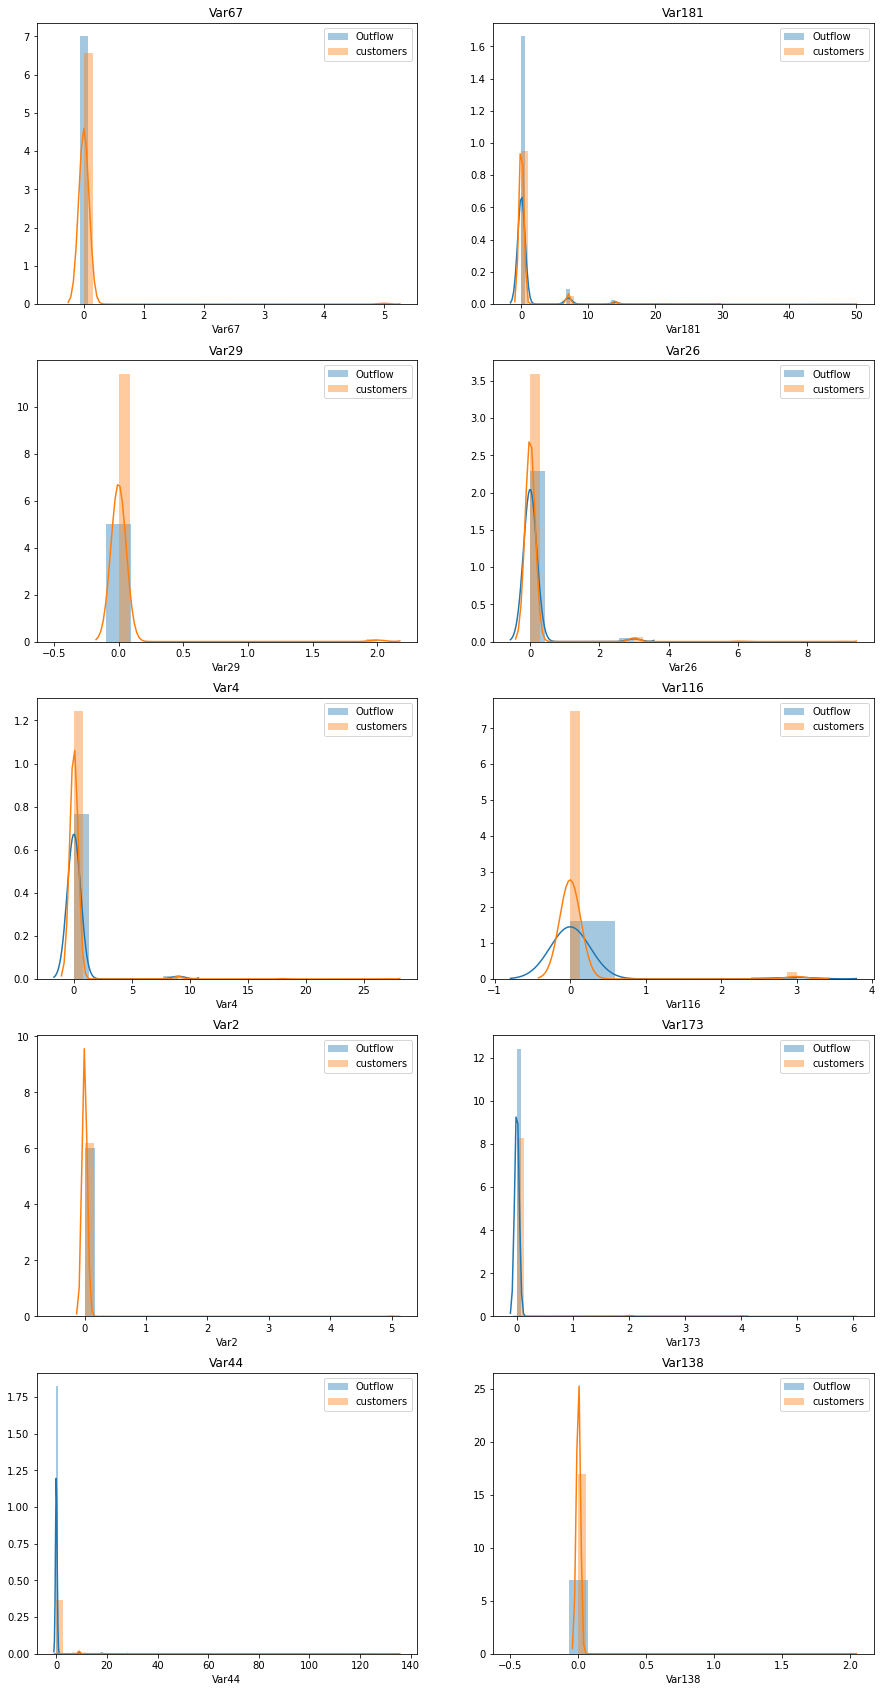

In [36]:
# визуализируем плотность распределения 10 числовых переменных, наименее сильно коррелирующих 
# с целевой функцией в зависимости от класса (Outflow - отток, customers - не отток)

pylab.figure(figsize=(15,30))
for i in range(train_top_bottom.shape[1]-1):
    pylab.subplot(5,2,i+1)
    sns.distplot(train_top_bottom[train_top_bottom['label']==1].iloc[:,i].dropna(),label='Outflow')
    sns.distplot(train_top_bottom[train_top_bottom['label']==-1].iloc[:,i].dropna(),label='customers')
    pylab.legend()
    pylab.title(train_top_bottom.columns[i])
pylab.show()

/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


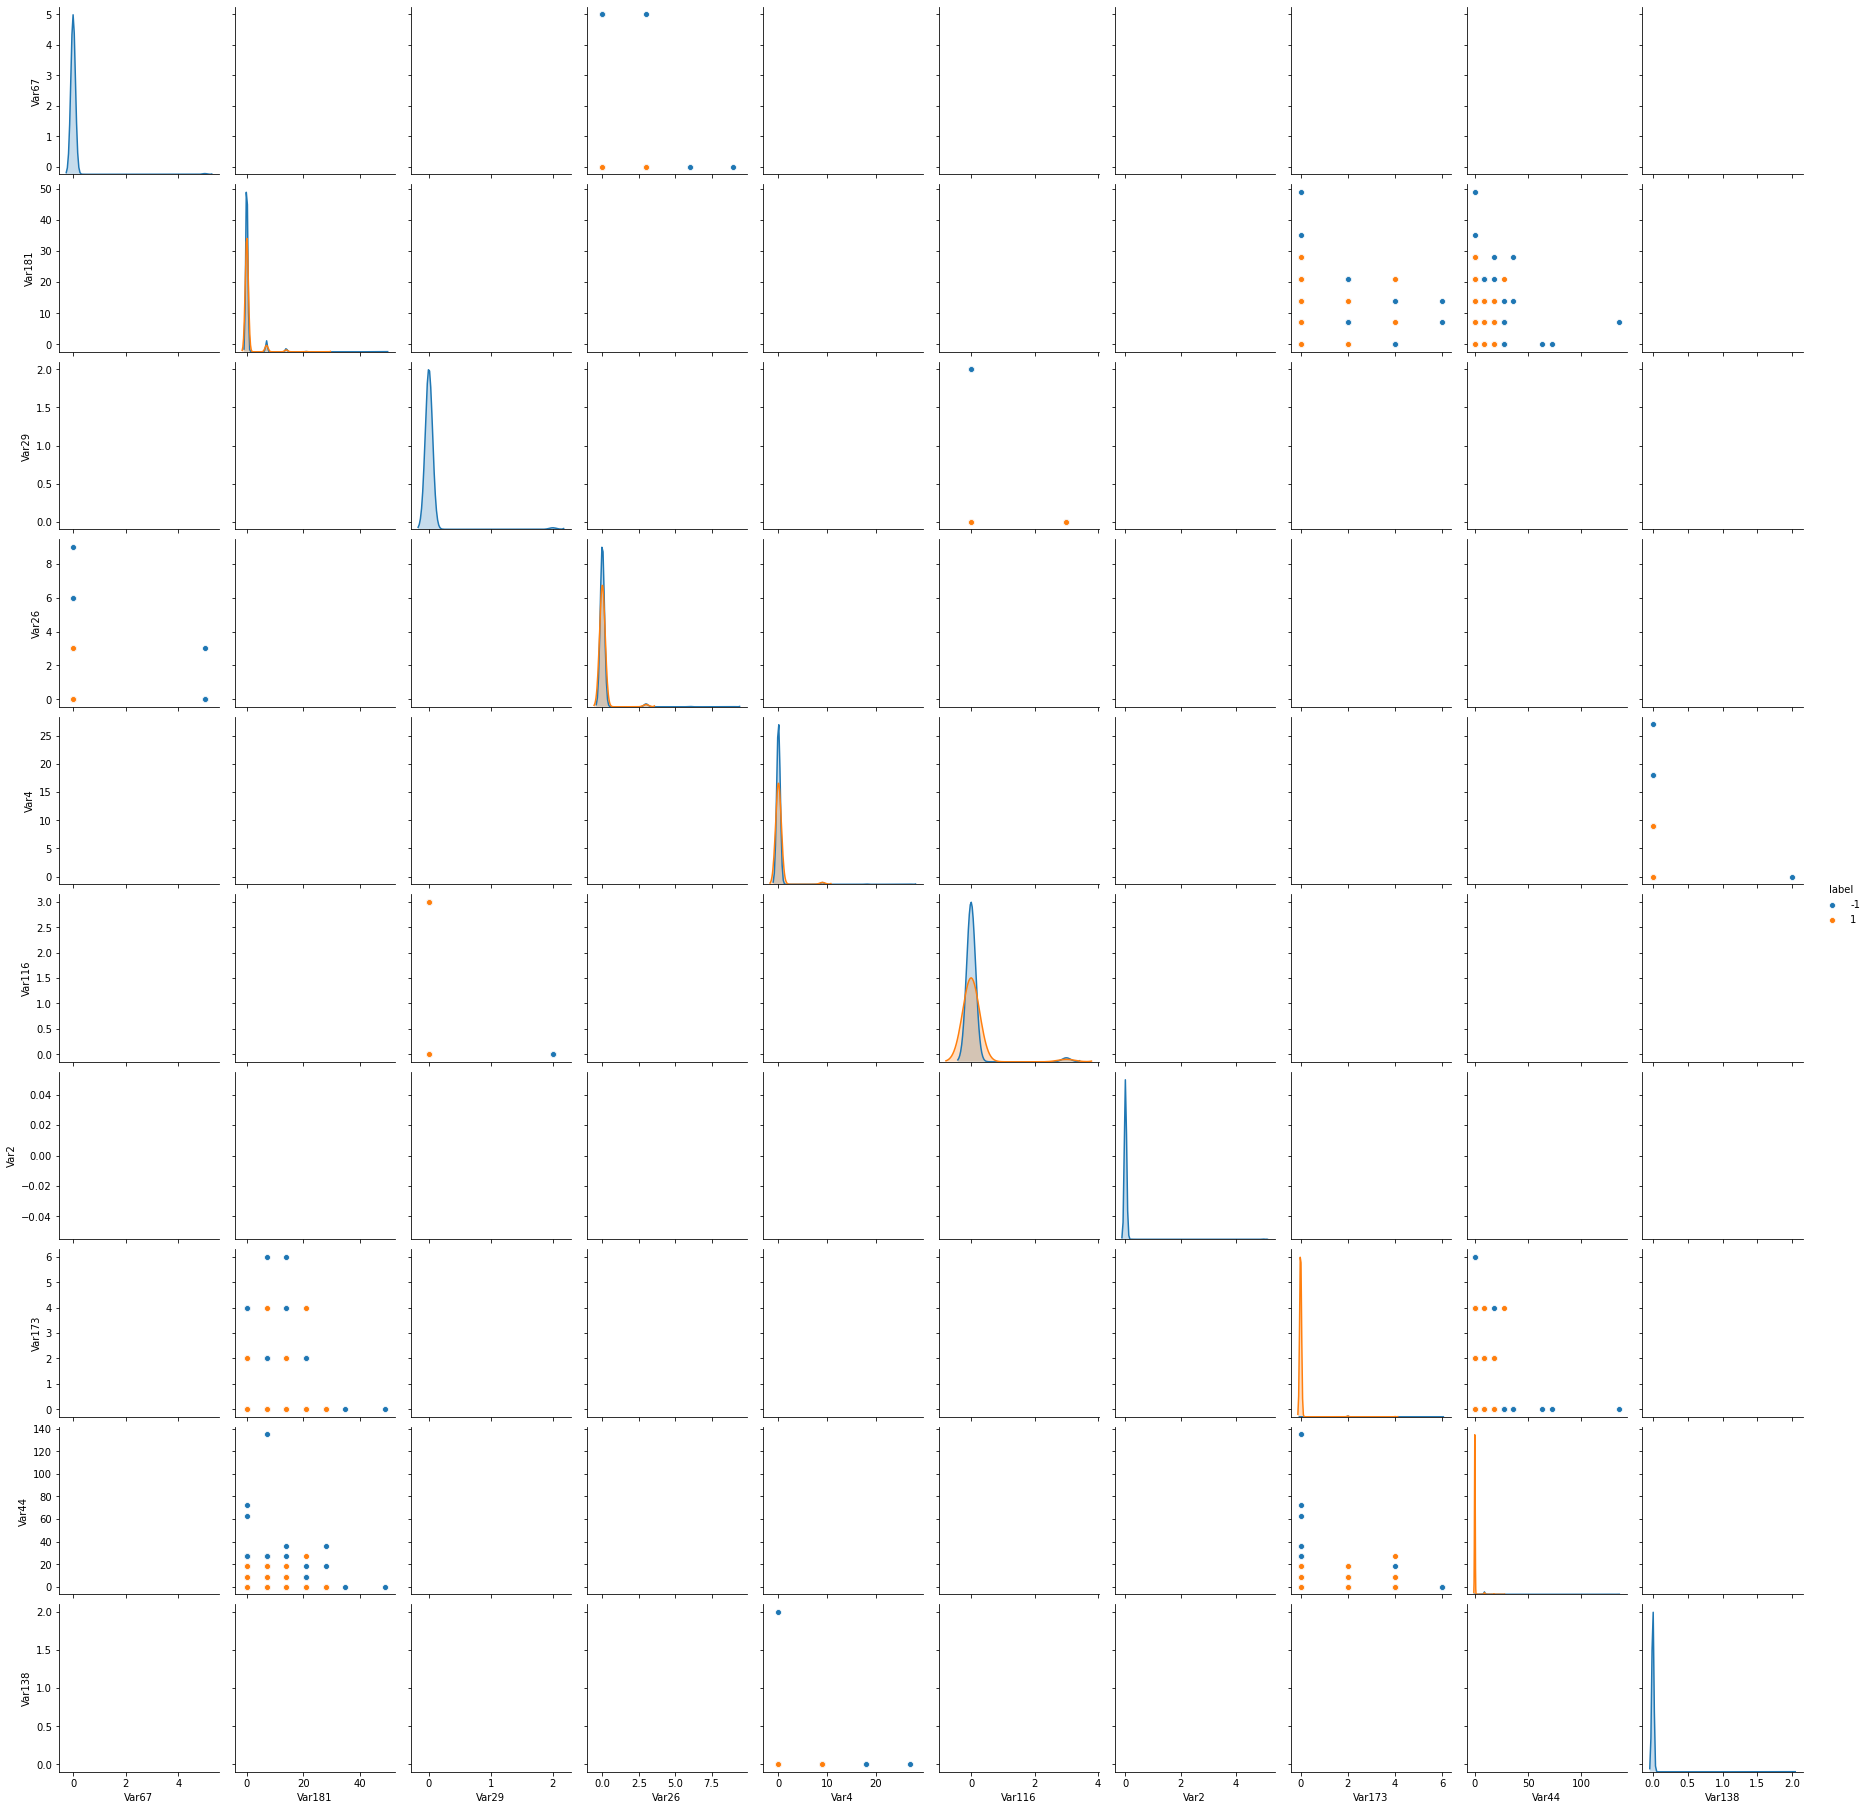

In [37]:
# теперь посмотрим в координатах пар признаков
sns.pairplot(train_top_bottom,hue="label", diag_kind="kde")

#### По pairplot видим, что признаки между собой никак не связаны, графики  неинформативны, также из графиков видим что некоторые переменные не имеют значений при целевой функции label=1 (отток), поэтому можно считать их шумовыми

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [38]:
#создадим отдельный dataframe для категориальных переменных
train_category=train.iloc[:,190:]
train_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var191  871 non-null    object 
 1   Var192  39709 non-null  object 
 2   Var193  40000 non-null  object 
 3   Var194  10190 non-null  object 
 4   Var195  40000 non-null  object 
 5   Var196  40000 non-null  object 
 6   Var197  39877 non-null  object 
 7   Var198  40000 non-null  object 
 8   Var199  39996 non-null  object 
 9   Var200  19634 non-null  object 
 10  Var201  10190 non-null  object 
 11  Var202  39999 non-null  object 
 12  Var203  39877 non-null  object 
 13  Var204  40000 non-null  object 
 14  Var205  38453 non-null  object 
 15  Var206  35565 non-null  object 
 16  Var207  40000 non-null  object 
 17  Var208  39877 non-null  object 
 18  Var209  0 non-null      float64
 19  Var210  40000 non-null  object 
 20  Var211  40000 non-null  object 
 21  Var212  40000 non-null  object 
 22

Мера взаимодействия между категориальными признаками вычисляется коэффициентом V Крамера, который определяется через критерий Хи-квадрат. Для категориальных признаков критерий хи-квадрат проверяет гипотезу о равенстве нулю коэффициента V Крамера  против альтернативы, что он нулю не равен. Коэффициент V Крамера=0, соответствует полному отсутствию взаимосвязи, а 1 — полному совпадению переменных.
 Критерий хи-квадрат для таблиц сопряженности может применяться при n ≥ 40 и количество элементов в каждой ячейке таблицы меньше 5, было не более, чем в 20% ячеек. Таким образом, для каждой категориальной переменной нам необходимо построить таблицы сопряженности и отфильтровать переменные, удовлетворяющие условию применения критерия Хи-квадрат

In [41]:
# Проверим Критерий Хи-квадрат и Коэффициент V-Крамера для переменных, удовлетворяющих условиям критерия Хи-квадрат
category_vars=[]
for i, cat_var in enumerate(train_category.columns):
    table=pd.DataFrame({'label=1':train_category[train_category['label']==1].iloc[:,i].value_counts(),
                    'label=-1':train_category[train_category['label']==-1].iloc[:,i].value_counts()})
    table.fillna(0,inplace=True)
    if table.size >0 and float(len(table[table['label=1']<5])+len(table[table['label=-1']<5]))/table.size <= 0.2:
        category_vars.append((cat_var, stats.chi2_contingency(table, correction=False)[1],np.sqrt(stats.chi2_contingency(table, correction=False)[0]/(len(train.iloc[:,i])*1))))

In [42]:
V_kramer=pd.DataFrame(category_vars,columns=['Var','p_value','V_Kramer']).sort_values(by=['V_Kramer'],ascending=False)
V_kramer

,Var,p_value,V_Kramer
4,Var206,2.662850e-38,0.076363
3,Var205,3.007666e-46,0.072394
2,Var204,9.189547e-08,0.069023
16,Var227,2.666712e-24,0.055619
11,Var221,1.342547e-18,0.049119
6,Var210,8.606806e-19,0.048540
15,Var226,6.673381e-11,0.048516
10,Var218,5.657773e-19,0.044493
7,Var211,1.450594e-10,0.032052
14,Var225,4.034848e-05,0.022492


Видим, что последние 4 признака никак не связаны с целевой функцией

In [43]:
V_kramer_vars=list(V_kramer.Var)
train_kramer=train[V_kramer_vars+['label']]

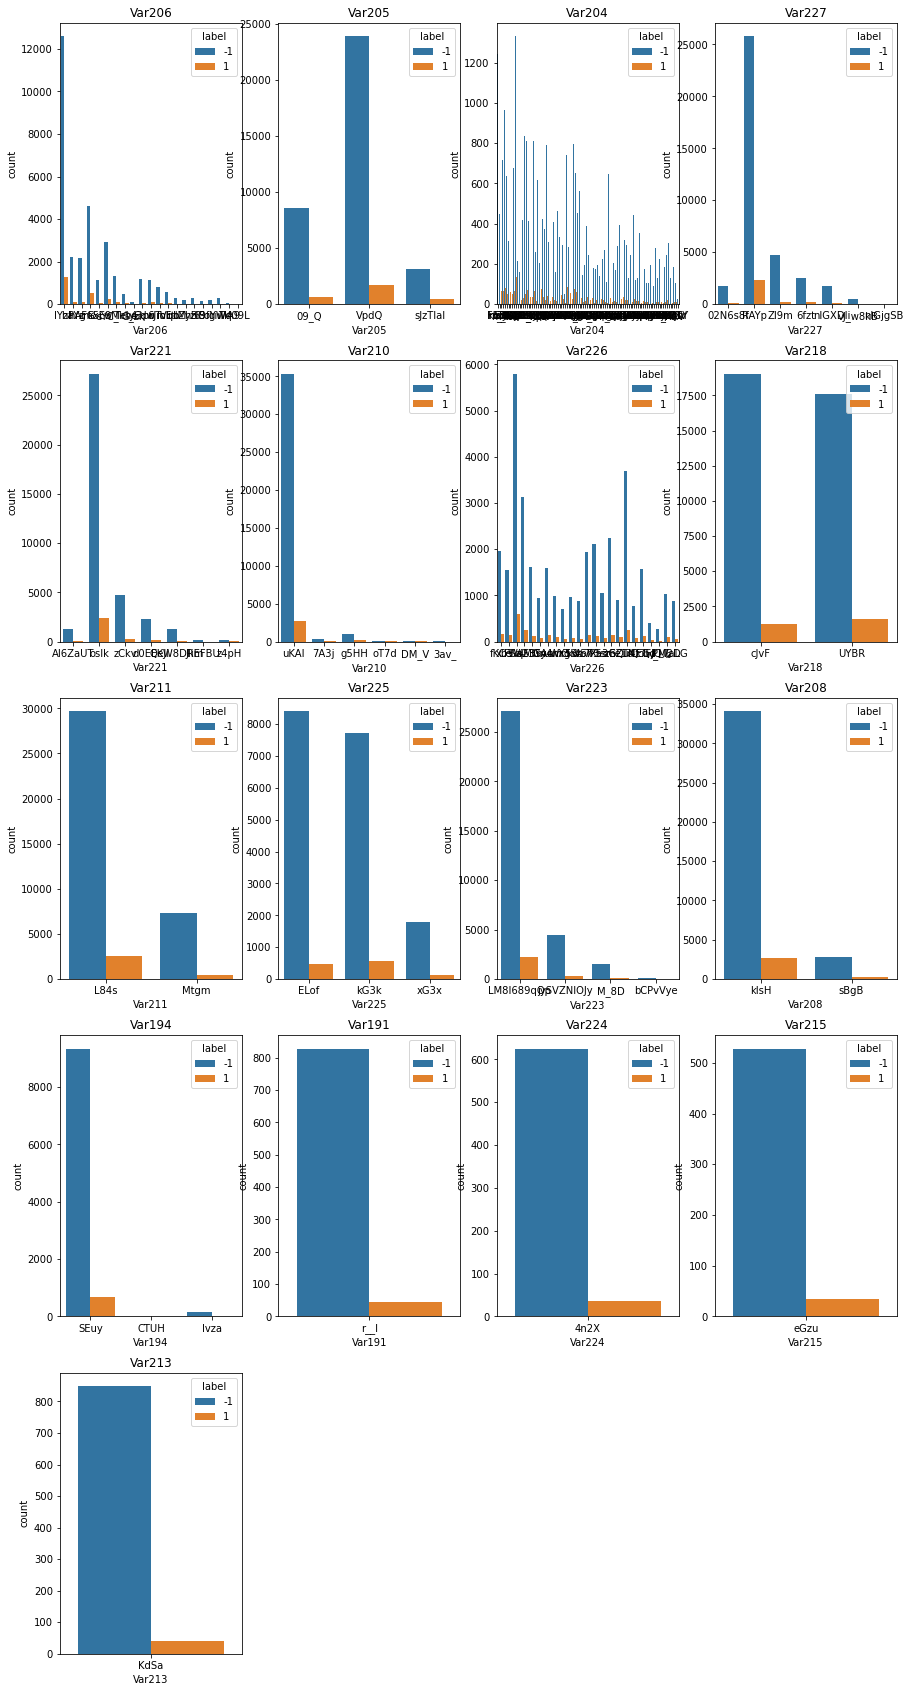

In [44]:
# визуализируем плотность распределения 10 числовых переменных, наименее сильно коррелирующих 
# с целевой функцией в зависимости от класса (Outflow - отток, customers - не отток)

pylab.figure(figsize=(15,30))
for i in range(len(V_kramer_vars)):
    pylab.subplot(5,4,i+1)
    sns.countplot(x=V_kramer_vars[i], data=train_kramer, hue='label')
    #plt.legend('aaa','ss')
    pylab.title(V_kramer_vars[i])
pylab.show()

Визуально по этим переменным можно сделать вывод, что скорее всего значима переменная Var218(доля категории UYBR больше при целевой функции=1),Var225 и Var206, последние 5 неинформативны. Таким образом необходимо делать отбор и по категориальным признакам.

Теперь необходимо визуализировать оставшиеся категориальные признаки, не удовлетворяющие условию критерия Хи-квадрат, они могут быть информативны. Так как эти данные очень разрежженые и включают в себя большое количество категорий, использование стандартных диаграмм для категориальных признаков будет неинформативным. Попробуем преобразовать их в числа, чтобы их было лучше интерпретировать. Для этого воспользуемся LabelEncoder

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df=train_category
mask=df.isnull()
train_category_encoder=train_category

In [48]:
train_category_encoder=train_category_encoder.astype(str).apply(LabelEncoder().fit_transform)
train_category_encoder=train_category_encoder.where(~mask,train_category)
train_category_encoder['label']=labels
train_category_encoder.head()

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,label
0,NaN,67,45,NaN,15,0,0,1070,264,NaN,...,2997,0,NaN,NaN,6,0,22,NaN,NaN,-1
1,NaN,77,0,NaN,15,0,31,3607,2803,5543,...,2746,0,NaN,0,15,2,12,1,NaN,-1
2,NaN,18,9,NaN,15,0,14,1883,2738,NaN,...,1666,0,NaN,NaN,20,3,18,1,NaN,-1
3,NaN,255,18,NaN,15,0,111,2912,605,NaN,...,1783,0,NaN,NaN,15,2,28,NaN,NaN,1
4,NaN,286,18,NaN,15,0,119,2231,1663,NaN,...,419,0,NaN,NaN,4,2,28,NaN,NaN,-1


/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/alexander/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, U

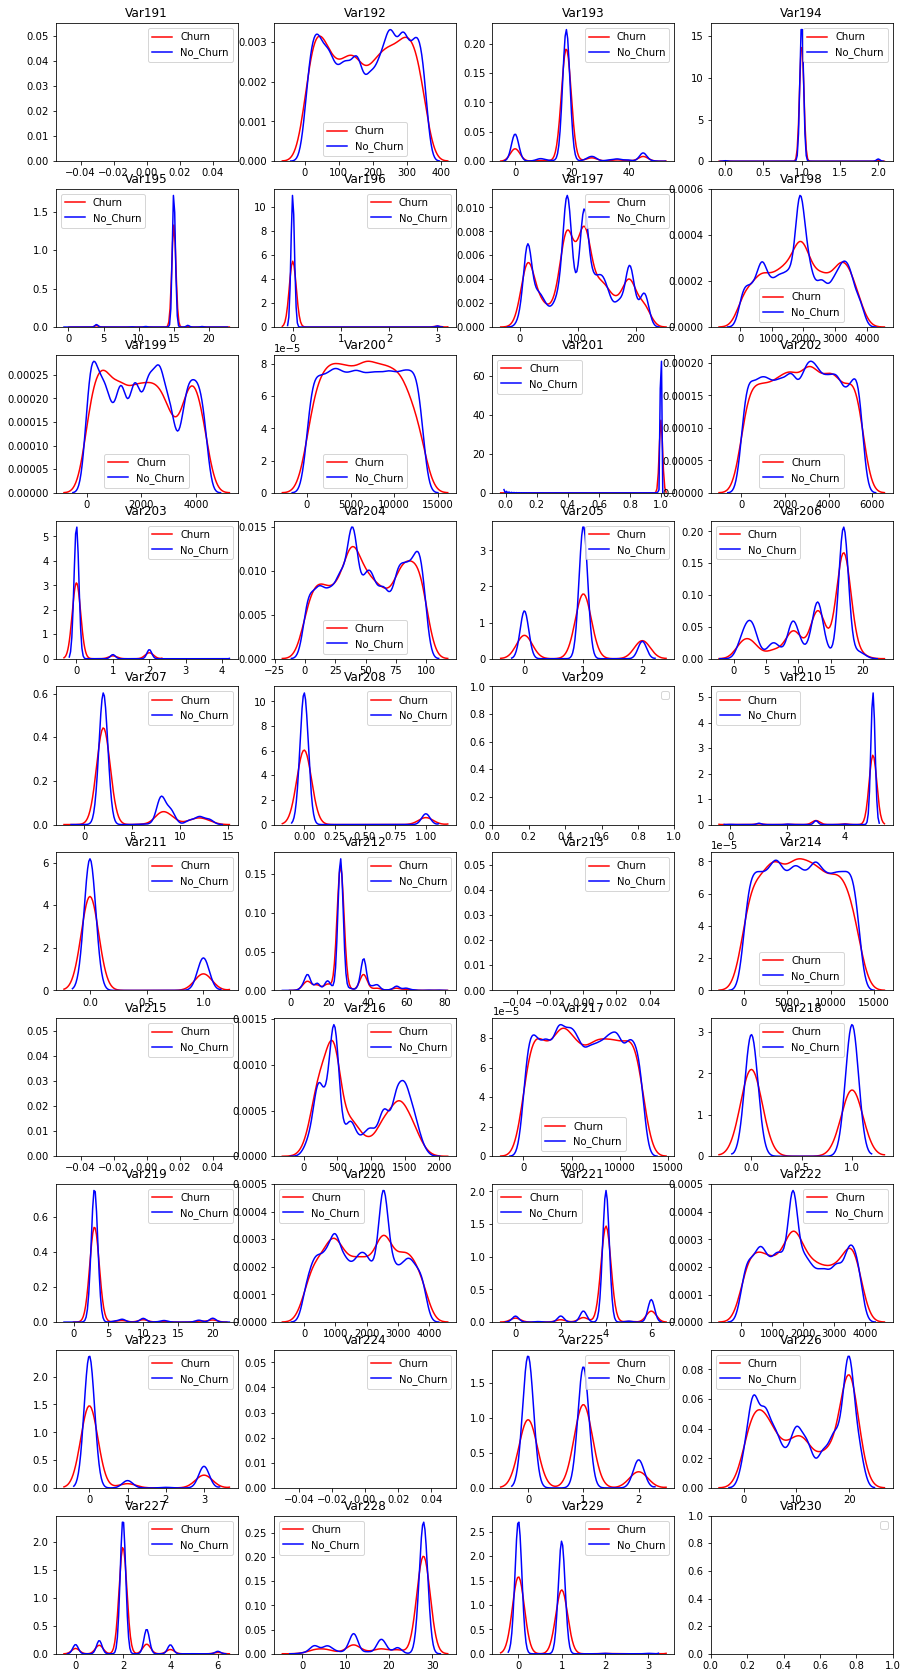

In [49]:
pylab.figure(figsize=(15,30))
for i in range(train_category_encoder.shape[1]-1):
    pylab.subplot(10,4,i+1)
    sns.kdeplot(train_category_encoder[train_category_encoder['label']==1].iloc[:,i].dropna(),label='Churn',color='red')
    sns.kdeplot(train_category_encoder[train_category_encoder['label']==-1].iloc[:,i].dropna(),label='No_Churn',color='blue')
    pylab.legend()
    pylab.title(train_category_encoder.columns[i])
pylab.show()

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?:

#### Ответ: Много шумовых данных, неинформативных, а также признаков, коррелирующих между собой. Необходим отбор признаков. Закономерности есть как и в числовых переменных так и в категориальных. Var177, Var114, Var36 - есть корреляция
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?

#### Ответ: Из числовых переменных: Var131, Var69, Var53, (Var177, Var114, Var36)- есть корреляция этих признаков), Var139
Из категориальных: Var218, Var225
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?

#### Ответ: переменные в которых есть данные только по label=-1(No churn), коррелирующие переменные, переменные только с одной категорией, например Var191, Var224, Var215, Var213
* Как вы думаете, окажется ли отбор признаков полезным для построения модели? 

#### Ответ: Да, отбор признаков необходим